In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('spam.csv',encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


1. data로드 분석후 전처리 진행
2. 분석된 내용을 기반으로 문제를 선택하고 학습후 결과를 계산
3. data를 3종으로 나누고 최종 test 데이터의 점수가 높게 나오도록 자유롭게 모델을 튜닝하여 결과를 만드시오

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM, GRU,BatchNormalization,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [4]:
data=data[['v1','v2']]
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data

C:\Users\user\AppData\Local\Temp/ipykernel_11272/1291640571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
data.drop_duplicates(subset=['v2'], inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
X_data = data['v2']
y_data = data['v1']

In [7]:
X_train, tt_x, y_train, tt_y = train_test_split(X_data, y_data, test_size=0.3, random_state=0, stratify=y_data)

In [8]:
t_x, v_x, t_y, v_y = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

In [9]:
tk = Tokenizer()
tk.fit_on_texts(t_x)
t_x = tk.texts_to_sequences(t_x)

In [10]:
word_to_index = tk.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'your': 11,
 'my': 12,
 'for': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'but': 22,
 'now': 23,
 'not': 24,
 'so': 25,
 'or': 26,
 'at': 27,
 'can': 28,
 'will': 29,
 'do': 30,
 'be': 31,
 'get': 32,
 "i'm": 33,
 'just': 34,
 'with': 35,
 'if': 36,
 'up': 37,
 'this': 38,
 'we': 39,
 'no': 40,
 'how': 41,
 'gt': 42,
 'lt': 43,
 '4': 44,
 'ur': 45,
 'go': 46,
 'out': 47,
 'free': 48,
 'from': 49,
 'ok': 50,
 'when': 51,
 'like': 52,
 'what': 53,
 'know': 54,
 'got': 55,
 'then': 56,
 'good': 57,
 'am': 58,
 'love': 59,
 'all': 60,
 'was': 61,
 'want': 62,
 'he': 63,
 'time': 64,
 'day': 65,
 'come': 66,
 'only': 67,
 'there': 68,
 'text': 69,
 'its': 70,
 'going': 71,
 'lor': 72,
 'need': 73,
 'as': 74,
 'home': 75,
 'see': 76,
 'send': 77,
 'one': 78,
 'any': 79,
 'da': 80,
 'still': 81,
 'about': 82,
 'k': 83,
 'txt': 84,
 'dont

In [11]:
n=len(word_to_index) + 1

In [33]:
n

6386

In [12]:
s_t_x = pad_sequences(t_x)
s_t_x.shape

(2894, 189)

In [37]:
len(t_x)

2894

In [38]:
t_x

[[17,
  100,
  7,
  126,
  3,
  24,
  236,
  105,
  50,
  7,
  95,
  154,
  24,
  2,
  1826,
  10,
  52,
  38,
  50],
 [1, 66, 96, 192, 102, 37, 66, 47, 802, 571, 45, 540],
 [36,
  3,
  89,
  11,
  155,
  29,
  46,
  2,
  248,
  244,
  201,
  130,
  27,
  156,
  201,
  130,
  912,
  259,
  211,
  157,
  1827,
  662,
  1828,
  1829,
  1194,
  1830,
  1831,
  90,
  17,
  92,
  36,
  376],
 [198,
  27,
  2754,
  1035,
  2755,
  1,
  29,
  31,
  47,
  82,
  393,
  663,
  282,
  2756,
  26,
  9,
  18,
  2,
  249],
 [222,
  1415,
  41,
  418,
  18,
  97,
  312,
  21,
  3,
  68,
  23,
  21,
  3,
  158,
  30,
  3,
  118,
  15,
  10,
  1,
  419,
  12,
  1416,
  7,
  77,
  3,
  4,
  1195,
  474,
  49,
  1036,
  5,
  913],
 [803, 3, 4, 621, 125],
 [1,
  62,
  109,
  2757,
  12,
  2758,
  394,
  1,
  73,
  4,
  260,
  355,
  20,
  1832,
  10,
  84,
  726,
  2,
  2759,
  13,
  40,
  2760,
  1833,
  84,
  93,
  20,
  283,
  84,
  2761,
  293,
  2762,
  2763,
  2764,
  2765,
  2766],
 [284, 176, 475,

In [34]:
s_t_x

array([[   0,    0,    0, ...,   52,   38,   50],
       [   0,    0,    0, ...,  571,   45,  540],
       [   0,    0,    0, ...,   92,   36,  376],
       ...,
       [   0,    0,    0, ...,  637,    2, 1111],
       [   0,    0,    0, ...,  270,  553, 1360],
       [   0,    0,    0, ...,   11, 1603,   23]])

In [13]:
tt_x = tk.texts_to_sequences(tt_x)
tt_x = pad_sequences(tt_x)
v_x = tk.texts_to_sequences(v_x)
v_x = pad_sequences(v_x)

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

SimpleRNN

In [15]:
mc1 = ModelCheckpoint('best_m1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
m1 = Sequential()
m1.add(Embedding(n, 64)) #차원축소 (학습 능력 향상) 피처의 개수
m1.add(SimpleRNN(64,dropout=0.5,return_sequences=True)) 
m1.add(SimpleRNN(32,dropout=0.5)) 
m1.add(Dense(1, activation='sigmoid'))
m1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history1 = m1.fit(s_t_x, t_y,epochs=15, callbacks=[es, mc1],batch_size=64,  validation_data=(v_x,v_y) )

Epoch 1/15
46/46 [==============================] - 9s 136ms/step - loss: 0.3282 - acc: 0.8683 - val_loss: 0.2012 - val_acc: 0.9365

Epoch 00001: val_acc improved from -inf to 0.93646, saving model to best_m1.h5
Epoch 2/15
46/46 [==============================] - 6s 133ms/step - loss: 0.1022 - acc: 0.9724 - val_loss: 0.1317 - val_acc: 0.9586

Epoch 00002: val_acc improved from 0.93646 to 0.95856, saving model to best_m1.h5
Epoch 3/15
46/46 [==============================] - 5s 116ms/step - loss: 0.0523 - acc: 0.9865 - val_loss: 0.1007 - val_acc: 0.9682

Epoch 00003: val_acc improved from 0.95856 to 0.96823, saving model to best_m1.h5
Epoch 4/15
46/46 [==============================] - 5s 101ms/step - loss: 0.0328 - acc: 0.9924 - val_loss: 0.1166 - val_acc: 0.9655

Epoch 00004: val_acc did not improve from 0.96823
Epoch 5/15
46/46 [==============================] - 5s 100ms/step - loss: 0.0157 - acc: 0.9965 - val_loss: 0.1051 - val_acc: 0.9710

Epoch 00005: val_acc improved from 0.96823

In [16]:
ck1=m1.evaluate(tt_x, tt_y)

49/49 [==============================] - 1s 9ms/step - loss: 0.1027 - acc: 0.9813


LSTM

In [17]:
mc2 = ModelCheckpoint('best_m2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
m2 = Sequential()
m2.add(Embedding(n, 64))
m2.add(LSTM(64,dropout=0.5,return_sequences=True)) 
m2.add(LSTM(32,dropout=0.5)) 
m2.add(Dense(1, activation='sigmoid'))
m2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = m2.fit(s_t_x, t_y,epochs=15, callbacks=[es, mc2],batch_size=64,  validation_data=(v_x,v_y) )

Epoch 1/15
46/46 [==============================] - 14s 232ms/step - loss: 0.3925 - acc: 0.8649 - val_loss: 0.2083 - val_acc: 0.9213

Epoch 00001: val_acc improved from -inf to 0.92127, saving model to best_m2.h5
Epoch 2/15
46/46 [==============================] - 10s 215ms/step - loss: 0.0973 - acc: 0.9758 - val_loss: 0.0878 - val_acc: 0.9738

Epoch 00002: val_acc improved from 0.92127 to 0.97376, saving model to best_m2.h5
Epoch 3/15
46/46 [==============================] - 10s 217ms/step - loss: 0.0387 - acc: 0.9914 - val_loss: 0.0716 - val_acc: 0.9793

Epoch 00003: val_acc improved from 0.97376 to 0.97928, saving model to best_m2.h5
Epoch 4/15
46/46 [==============================] - 10s 221ms/step - loss: 0.0223 - acc: 0.9952 - val_loss: 0.0713 - val_acc: 0.9807

Epoch 00004: val_acc improved from 0.97928 to 0.98066, saving model to best_m2.h5
Epoch 5/15
46/46 [==============================] - 10s 215ms/step - loss: 0.0109 - acc: 0.9983 - val_loss: 0.0763 - val_acc: 0.9807

Epoch

In [18]:
ck2=m2.evaluate(tt_x, tt_y)

49/49 [==============================] - 2s 23ms/step - loss: 0.0861 - acc: 0.9819


GRU

In [19]:
mc3 = ModelCheckpoint('best_m3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
m3 = Sequential()
m3.add(Embedding(n, 64))
m3.add(GRU(64,dropout=0.5,return_sequences=True)) 
m3.add(GRU(32,dropout=0.5)) 
m3.add(Dense(1, activation='sigmoid'))
m3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history3 = m3.fit(s_t_x, t_y,epochs=15, callbacks=[es, mc3],batch_size=64,  validation_data=(v_x,v_y) )

Epoch 1/15
46/46 [==============================] - 15s 255ms/step - loss: 0.3887 - acc: 0.8645 - val_loss: 0.2097 - val_acc: 0.8936

Epoch 00001: val_acc improved from -inf to 0.89365, saving model to best_m3.h5
Epoch 2/15
46/46 [==============================] - 10s 214ms/step - loss: 0.0861 - acc: 0.9699 - val_loss: 0.0737 - val_acc: 0.9820

Epoch 00002: val_acc improved from 0.89365 to 0.98204, saving model to best_m3.h5
Epoch 3/15
46/46 [==============================] - 9s 196ms/step - loss: 0.0269 - acc: 0.9917 - val_loss: 0.0657 - val_acc: 0.9820

Epoch 00003: val_acc did not improve from 0.98204
Epoch 4/15
46/46 [==============================] - 9s 193ms/step - loss: 0.0138 - acc: 0.9969 - val_loss: 0.0708 - val_acc: 0.9807

Epoch 00004: val_acc did not improve from 0.98204
Epoch 5/15
46/46 [==============================] - 9s 188ms/step - loss: 0.0072 - acc: 0.9986 - val_loss: 0.0623 - val_acc: 0.9848

Epoch 00005: val_acc improved from 0.98204 to 0.98481, saving model to b

In [20]:
ck3=m3.evaluate(tt_x, tt_y)

49/49 [==============================] - 1s 16ms/step - loss: 0.0742 - acc: 0.9845


Bidirectional(LSTM)

In [21]:
mc4 = ModelCheckpoint('best_m4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
m4 = Sequential()
m4.add(Embedding(n, 64))
m4.add(Bidirectional(LSTM(64,dropout=0.5,return_sequences=True)))
m4.add(Bidirectional(LSTM(32,dropout=0.5))) 
m4.add(Dense(1, activation='sigmoid'))
m4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history4 = m4.fit(s_t_x, t_y,epochs=15, callbacks=[es, mc4],batch_size=64,  validation_data=(v_x,v_y) )

Epoch 1/15
46/46 [==============================] - 25s 399ms/step - loss: 0.3489 - acc: 0.8798 - val_loss: 0.1614 - val_acc: 0.9544

Epoch 00001: val_acc improved from -inf to 0.95442, saving model to best_m4.h5
Epoch 2/15
46/46 [==============================] - 18s 384ms/step - loss: 0.0652 - acc: 0.9872 - val_loss: 0.0671 - val_acc: 0.9834

Epoch 00002: val_acc improved from 0.95442 to 0.98343, saving model to best_m4.h5
Epoch 3/15
46/46 [==============================] - 17s 375ms/step - loss: 0.0252 - acc: 0.9927 - val_loss: 0.0706 - val_acc: 0.9834

Epoch 00003: val_acc did not improve from 0.98343
Epoch 4/15
46/46 [==============================] - 16s 354ms/step - loss: 0.0167 - acc: 0.9962 - val_loss: 0.0725 - val_acc: 0.9820

Epoch 00004: val_acc did not improve from 0.98343
Epoch 5/15
46/46 [==============================] - 18s 396ms/step - loss: 0.0095 - acc: 0.9979 - val_loss: 0.0789 - val_acc: 0.9820

Epoch 00005: val_acc did not improve from 0.98343
Epoch 6/15
46/46 [=

In [22]:
ck4=m4.evaluate(tt_x, tt_y)

49/49 [==============================] - 5s 37ms/step - loss: 0.0575 - acc: 0.9865


In [23]:
print(ck1,ck2,ck3,ck4,sep='\n')

[0.10268022119998932, 0.9813023805618286]
[0.08606545627117157, 0.981947124004364]
[0.07418546080589294, 0.9845260977745056]
[0.05754484981298447, 0.9864603281021118]


In [24]:
ck_v_1=m1.evaluate(v_x, v_y)
ck_v_2=m2.evaluate(v_x, v_y)
ck_v_3=m3.evaluate(v_x, v_y)
ck_v_4=m4.evaluate(v_x, v_y)
print(ck_v_1,ck_v_2,ck_v_3,ck_v_4,sep='\n')

23/23 [==============================] - 1s 39ms/step - loss: 0.0709 - acc: 0.9834
[0.12391841411590576, 0.9765193462371826]
[0.08113724738359451, 0.9792817831039429]
[0.07233978062868118, 0.988950252532959]
[0.07090014219284058, 0.9834254384040833]


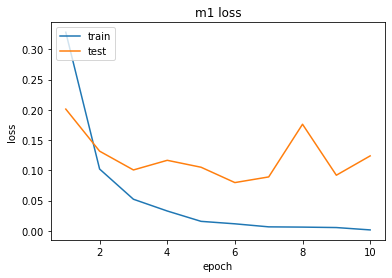

In [25]:
epochs = range(1, len(history1.history['acc']) + 1)
plt.plot(epochs, history1.history['loss'])
plt.plot(epochs, history1.history['val_loss'])
plt.title('m1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

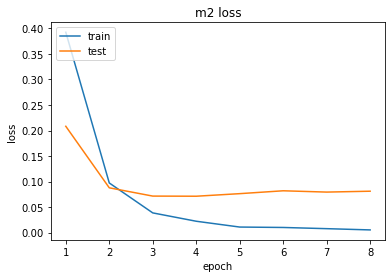

In [26]:
epochs = range(1, len(history2.history['acc']) + 1)
plt.plot(epochs, history2.history['loss'])
plt.plot(epochs, history2.history['val_loss'])
plt.title('m2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

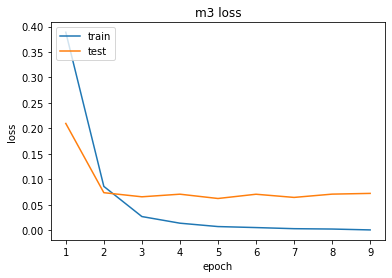

In [27]:
epochs = range(1, len(history3.history['acc']) + 1)
plt.plot(epochs, history3.history['loss'])
plt.plot(epochs, history3.history['val_loss'])
plt.title('m3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

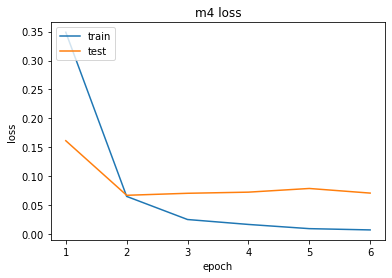

In [28]:
epochs = range(1, len(history4.history['acc']) + 1)
plt.plot(epochs, history4.history['loss'])
plt.plot(epochs, history4.history['val_loss'])
plt.title('m4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()